</br>
</br>
<h2> Naive Bayes Classifier </h2>
</br>
</br>


Naive Bayes Theorem:
<p align="center">
  <img width="300"  src="https://miro.medium.com/max/1020/1*tjcmj9cDQ-rHXAtxCu5bRQ.png">
</p>

The Naive Bayes Theorem is based on some assumptions. As these might not always be true it is kind of "naive" to use this classifier:

- e.g. Variables need to be independend (are they really?)


1. P(A)   = Prior Probability
2. P(B)   = Marginal Likelihood
3. P(B|A) = Likelihood
4. P(A|B) = Posterior Probability


For a classified dataset with 2 Features (e.g. Salary and Age) Bayes Theorem will be applied twice in order to predict the class of a data point. </br>
Let the classes be "walk to work" and "drive to work", we can use the Naive Bayes model to predict this based on their salary and Age.



<p>
Step 1: Calculate overall probability that someone walks to work P(Walks) = Number of walkers / Total observations </br>
Step 2: Calulate marginal Likelihood based on radius around data point to predict.  P(X) checks the probability of a point to be similar to the other points in the radius = Number of Observations in Circle / Total Observations. </br>
Step 4: Calculate likelihood P(B|A): That a point that also Walks (P(Walks)) is also similar to the observation (P(X)): 
Number of people who walk in raidus / number of walkers
</br>
After that do the same for the second class ("drives to work")

--> Now compare probabilities and classify accordingly
</p>

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('../sample_data/Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [7]:
# Fitting the Classification Model to the dataset
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [8]:
# Predicting a new result
y_pred = classifier.predict(X_test)


In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[55,  3],
       [ 4, 18]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


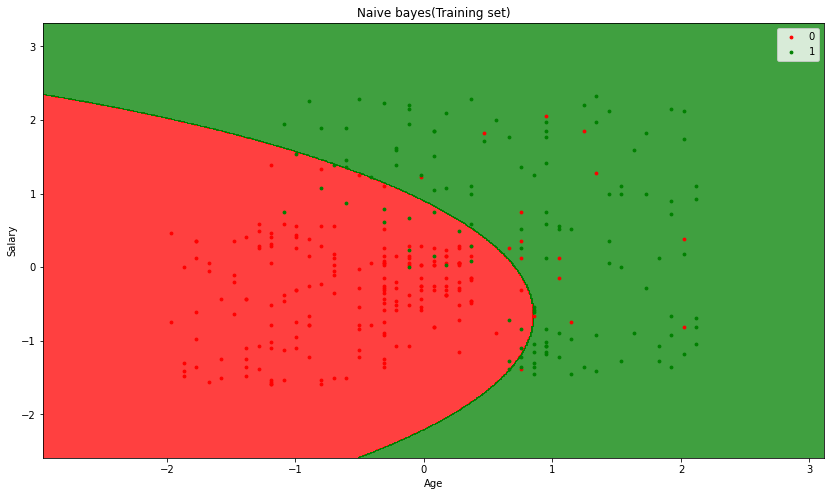

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, s=8)
plt.title('Naive bayes(Training set)')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.legend()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


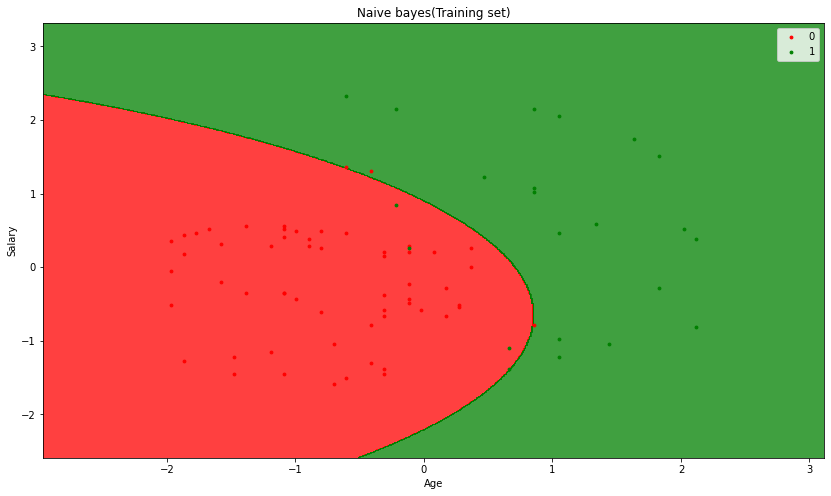

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
fig, ax = plt.subplots(1,1, figsize=(14,8))
ax.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
ax.set_xlim(X1.min(), X1.max())
ax.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, s=8)
plt.title('Naive bayes(Training set)')
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.legend()